In [85]:
# Import Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### Problem A: Visualizing `scores.csv` dataset

In [86]:
# Import data
df = pd.read_csv ('scores.csv')
df.head()

,gender,race,edu-level,lunch_type,test-prep,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


  1. For males, plot the `math_score` (x-axis) vs. the `writing_score` (y-axis). What do you observe from the plot? Your plot will look something like this:

  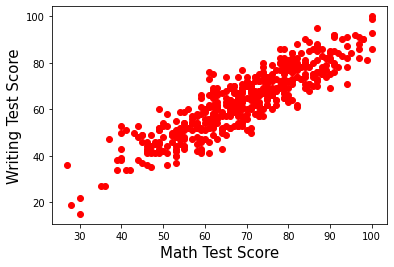




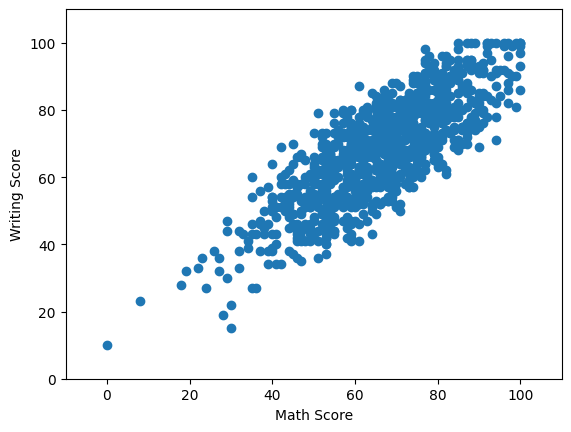

In [87]:
plt.scatter(df['math_score'], df['writing_score'])
plt.axis([min(df['math_score'])-10, max(df['math_score'])+10, min(df['writing_score'])-10, max(df['writing_score'])+10]);
plt.ylabel('Writing Score');
plt.xlabel('Math Score');

  2. Plot the `math_score` (x-axis) vs. the `writing_score` (y-axis) for both males and females. Make the male's points color 'seagreen' and the female's point the color 'salmon'. What do you observe from the plot? Your plot will look something like this:

  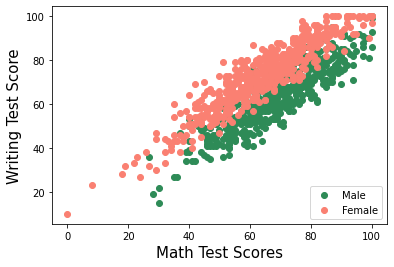

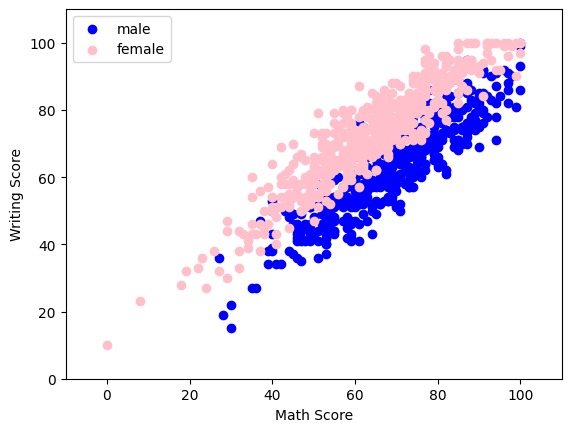

In [88]:
male = df['gender'] == 'male'
female = df['gender'] == 'female'
df_male = df[male]
df_female = df[female]


plt.scatter(df_male['math_score'], df_male['writing_score'], color ='blue')
plt.scatter(df_female['math_score'], df_female['writing_score'], color ='pink')
plt.axis([min(df['math_score'])-10, max(df['math_score'])+10, min(df['writing_score'])-10, max(df['writing_score'])+10]);

#lineObjects = plt.scatter(df['math_score'], df['writing_score'], c=pd.factorize(df['gender'])[0])
#plt.legend(lineObjects, ('male', 'female'))

plt.ylabel('Writing Score');
plt.xlabel('Math Score');
plt.legend(['male', 'female']);

### Problem B: Troubleshoot Manufacturing Line

You work as a Data Analyst for a manufacturing company. There was problem with the manufacturing line on a part and you are to determine which serial numbers need to be reworked.

They have provided you with 2 files, one from each production line.  The first CSV file (`cut.csv`) contains serial numbers of parts that went through the cutting process and the second CSV file (`clean.csv`) contains serial numbers of parts then went through the cleaning process.  Ultimately the parts need to complete both steps.

Your task is to report which parts missed one or the other step.


**1. Import Data Files**

  Your tasks in this part are:
  - Import `cut.csv` into a dataframe `cut_df`
  - Import `clean.csv` into a dataframe `clean_df`

In [89]:
# Import data
cut = pd.read_csv ('cut.csv')
cut

,serial_num,process
0,10000,cut
1,10002,cut
2,10005,cut
3,10009,cut
4,10010,cut
...,...,...
9457,24992,cut
9458,24994,cut
9459,24995,cut
9460,24998,cut


In [90]:
# Import data
clean = pd.read_csv ('clean.csv')
clean

,serial_num,process
0,10001,clean
1,10004,clean
2,10007,clean
3,10008,clean
4,10010,clean
...,...,...
9482,24992,clean
9483,24993,clean
9484,24996,clean
9485,24998,clean


**2. Determine which items have gone through cutting, cleaning, or both**

Using the clean and cut dataframes, determine which serial numbers exist in one data frame but not the other.

Your tasks in this part are:
  1. Determine which items have been cleaned but not cut and store the results in `cleaned_not_cut_df`.
  2. Determine which items have been cut but not cleaned store the results in `cut_not_cleaned_df`.
  3. Determine which items have been been through both steps store the results in `both_cleaned_and_cut_df`.

**Hint**: You can use the `merge()` method to combine two DataFrames based on common columns. This will give you the common elements between the DataFrames based on the specified columns. You can use different types of joins like `inner`, `outer`, `left`, or `right` depending on your requirements.

See this [link](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html) for detailed description on using `merge()` method.

In [91]:
#df = pd.merge(clean, cut, how='outer')
cleaned_not_cut_df = pd.merge(clean, cut, on = 'serial_num', how='left')

In [92]:
cleaned_not_cut_df.sort_values('serial_num', inplace=True)
cleaned_not_cut_df

,serial_num,process_x,process_y
0,10001,clean,NaN
1,10004,clean,NaN
2,10007,clean,NaN
3,10008,clean,NaN
4,10010,clean,cut
...,...,...,...
9482,24992,clean,cut
9483,24993,clean,NaN
9484,24996,clean,NaN
9485,24998,clean,cut


In [93]:
#df[df['column name'].isna()]
cleaned_not_cut_df = cleaned_not_cut_df[cleaned_not_cut_df['process_y'].isna()]
cleaned_not_cut_df

,serial_num,process_x,process_y
0,10001,clean,NaN
1,10004,clean,NaN
2,10007,clean,NaN
3,10008,clean,NaN
6,10012,clean,NaN
...,...,...,...
9476,24983,clean,NaN
9479,24989,clean,NaN
9483,24993,clean,NaN
9484,24996,clean,NaN


In [94]:
cut_not_cleaned_df = pd.merge(clean, cut, on= 'serial_num', how='right')
cut_not_cleaned_df.sort_values('serial_num', inplace=True)
cut_not_cleaned_df = cut_not_cleaned_df[cut_not_cleaned_df['process_x'].isna()]
cut_not_cleaned_df

,serial_num,process_x,process_y
0,10000,NaN,cut
1,10002,NaN,cut
2,10005,NaN,cut
3,10009,NaN,cut
7,10014,NaN,cut
...,...,...,...
9453,24987,NaN,cut
9454,24988,NaN,cut
9458,24994,NaN,cut
9459,24995,NaN,cut


In [95]:
both_cleaned_and_cut_df = pd.merge(clean, cut, on= 'serial_num', how='inner')
both_cleaned_and_cut_df

,serial_num,process_x,process_y
0,10010,clean,cut
1,10011,clean,cut
2,10013,clean,cut
3,10015,clean,cut
4,10016,clean,cut
...,...,...,...
5990,24986,clean,cut
5991,24990,clean,cut
5992,24991,clean,cut
5993,24992,clean,cut


**3. Create a graph that will allow the manufacturing team to visualize your results**

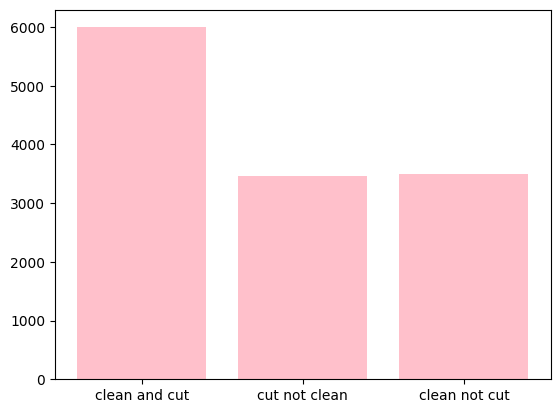

In [96]:
process = ['clean and cut', 'cut not clean', 'clean not cut']
values = [5995, 3467, 3492]

df = pd.DataFrame(list(zip(process, values)), columns = ["Processes", "Frequencies"])

plt.bar(df['Processes'], df['Frequencies'], color = 'pink');

### Problem C: Churn Modeling
You work as a Data Analyst at XYZ Bank. The bank is working on an initiative to market more to the customers who are more likely to churn (leave the bank for another bank) in order to improve customer retention. Your manager has asked you to roll up some visualizations highlighting some indicators that customers are likely to churn.

#### Part 1 - Import and Clean Data:

1. Import `Churnn_Modelling.csv` file
2. Remove `RowNumber` column
3. Set `CustomerId` column as index
4. Change `Age` column to float and remove rows with `UNKNOWN`

In [97]:
churn = pd.read_csv('Churn_Modelling.csv')
churn

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,UNKNOWN,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [98]:
churn.drop(columns = ['RowNumber'], inplace=True)

In [99]:
churn.set_index(['CustomerId'], inplace=True)

In [100]:
unknown = churn['Age'] != 'UNKNOWN'
churn = churn[unknown]
churn

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,,,,,,,,,,,,
15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
...,...,...,...,...,...,...,...,...,...,...,...,...
15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1


In [101]:
churn['Age'] = churn['Age'].astype(float)

<ipython-input-101-94fd58c3c778>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn['Age'] = churn['Age'].astype(float)


#### Part 2 - Data Formatting:
Using `Exited` Column, answer the following:
1. Which country in the dataset should we start our marketing campaign in?
2. Should we focus our marketing effort on a specific gender?
3. Should we focus our marketing efforts on a certain age range? If so, what range?

In [102]:
churn.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [103]:
churn.groupby('Geography').sum('Exited').sort_values(by='Exited', ascending=False)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Geography,,,,,,,,,
Germany,1633842,99746.0,12562,3.002773e+08,3812,1791,1248,2.535296e+08,813
France,3253706,192894.0,25057,3.109506e+08,7668,3538,2588,5.003595e+08,810
Spain,1610465,96182.0,12435,1.528706e+08,3807,1719,1311,2.458299e+08,413


Based on the exited column, most people have left the bank in Germany, France is a close second. We should probably increase our marketing skills in both Germany and France.

In [104]:
churn.groupby('Gender').sum('Exited').sort_values(by='Exited', ascending=False)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Gender,,,,,,,,,
Female,2955350,178189.0,22551,3.437205e+08,7012,3191,2283,4.567908e+08,1139
Male,3542663,210633.0,27503,4.203780e+08,8275,3857,2864,5.429281e+08,897


In [105]:
#from scipy import stats
#rng = np.random.default_rng()
#ideally to answer this question we should run a t test for difference in proportions,
#but not sure if thats what you want!

It appears that more women than men have churned. While we cannot say if the difference between the proportion of women is significantly less than if we pushed advertising efforts toward woman, I would suggest that we should try and reevaluate after a year.

In [106]:
churn.loc[churn['Age']<=18, 'Age Range'] = 'U18'
churn.loc[churn['Age'].between(19,26), 'Age Range'] = '19-26'
churn.loc[churn['Age'].between(27,40), 'Age Range'] = '27-40'
churn.loc[churn['Age'].between(41,55), 'Age Range'] = '41-55'
churn.loc[churn['Age']>55, 'Age Range'] = '55+'

<ipython-input-106-dd89d36de34b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn.loc[churn['Age']<=18, 'Age Range'] = 'U18'


In [107]:
churn['Age Range']

CustomerId
15634602    41-55
15647311    41-55
15619304    41-55
15737888    41-55
15574012    41-55
            ...  
15606229    27-40
15569892    27-40
15584532    27-40
15682355    41-55
15628319    27-40
Name: Age Range, Length: 9989, dtype: object

In [108]:
churn.groupby('Age Range').sum('Exited').sort_values(by='Exited', ascending=False)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Age Range,,,,,,,,,
41-55,1800295,127677.0,13873,2.217335e+08,4204,1917,1340,2.823323e+08,1056
27-40,3648805,191222.0,28097,4.183093e+08,8630,3999,2794,5.576505e+08,626
55+,521944,50784.0,3926,6.242024e+07,1204,568,589,7.696725e+07,294
19-26,511862,18743.0,4052,5.989363e+07,1216,550,411,8.089665e+07,58
U18,15107,396.0,106,1.741731e+06,33,14,13,1.872253e+06,2


Customers between ages of 41 and 55 seem to have churned the most, while next is 27-40. It seems that middle aged adults tend to leave the bank as opposed to other age ranges. Marketing should consider pushing advertisements toward these age ranges.

#### Part 3 - Data Visualization:
 * Roll up your findings into three visualizations for your manager to present to the marketing board.
 * Make sure you utilize the appropriate data visualization techniques and customizations to present your findings.
 1. Location to focus on
 2. Gender to focus on
 3. Age range to focus on

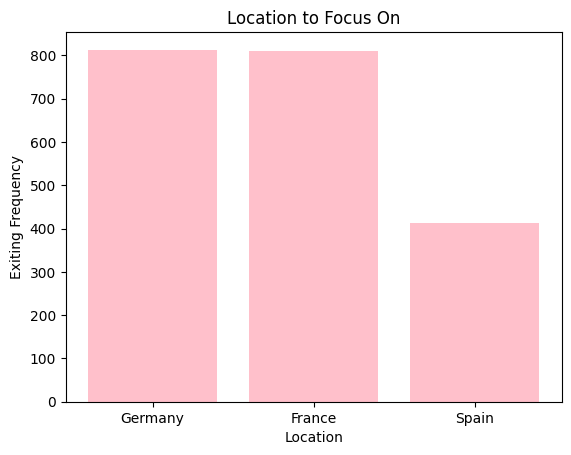

In [109]:
Locations = ['Germany', 'France', 'Spain']
Exited = [813, 810, 413]

df = pd.DataFrame(list(zip(Locations, Exited)), columns= ['Locations', 'Exited'])

plt.bar(df['Locations'], df['Exited'], color = 'pink');
plt.ylabel('Exiting Frequency');
plt.xlabel('Location');
plt.title('Location to Focus On');

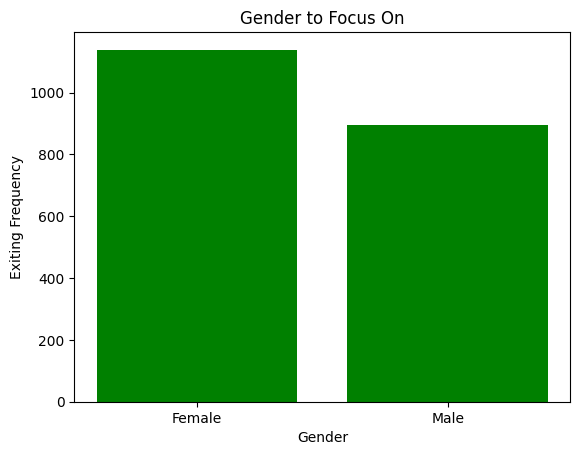

In [110]:
Genders = ['Female', 'Male']
Exited = [1139, 897]

df = pd.DataFrame(list(zip(Genders, Exited)), columns= ['Gender', 'Exited'])

plt.bar(df['Gender'], df['Exited'], color = 'green');
plt.ylabel('Exiting Frequency');
plt.xlabel('Gender');
plt.title('Gender to Focus On');

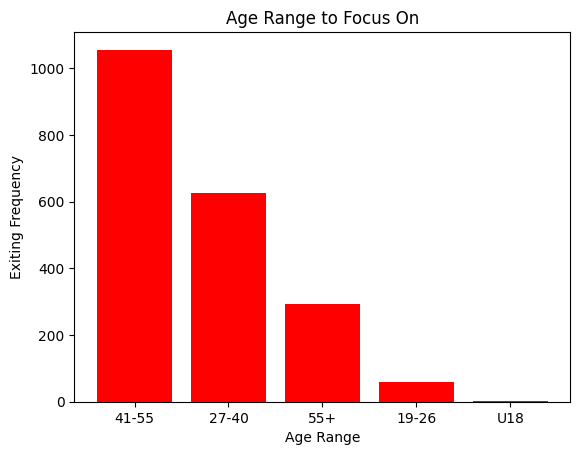

In [111]:
Ranges = ['41-55', '27-40', '55+', '19-26', 'U18']
Exited = [1056, 626, 294, 58, 2]

df = pd.DataFrame(list(zip(Ranges, Exited)), columns= ['Age Range', 'Exited'])

plt.bar(df['Age Range'], df['Exited'], color = 'red');
plt.ylabel('Exiting Frequency');
plt.xlabel('Age Range');
plt.title('Age Range to Focus On');